### 🎯 Cel biznesowy:
Model powinien na podstawie cech wizualnych odkrywać naturalne struktury w danych i utworzyć grupy (np. odpowiadające gatunkowm meduz)
- barrel_jellyfish
- blue_jellyfish
- compass_jellyfish
- lions_mane_jellyfish
- mauve_stinger_jellyfish
- Moon_jellyfish

Celem jest wykrywanie niekoniecznie wykrywanie gatunków meduz ale znaleznienie wspólnych cech na podstawie klasteryzacji.


Wyświetlanie przykładowych obrazków z każdego gatunku meduzy...


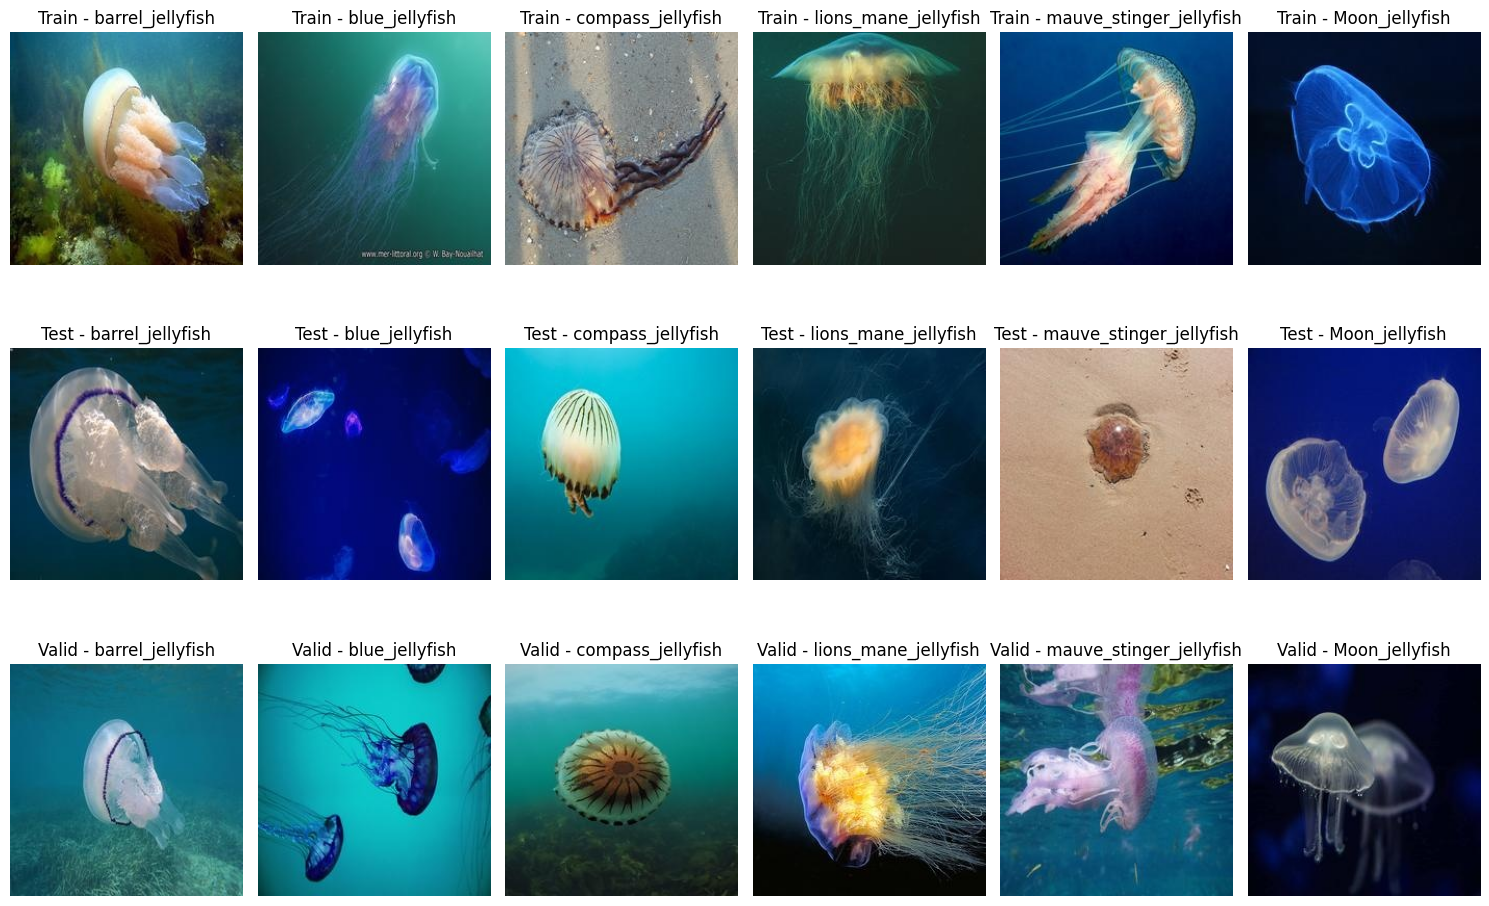

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Ścieżka do głównego folderu
DATA_DIR = 'DATA/Train_Test_Valid'

# Lista folderów = etykiety gatunków w folderach Train, Test i Valid
split_folders = ['Train', 'Test', 'Valid']

def show_sample_images():
    print("\nWyświetlanie przykładowych obrazków z każdego gatunku meduzy...")

    plt.figure(figsize=(15, 10))
    
    # Iteracja po trzech folderach: Train, Test, Valid
    for split in split_folders:
        split_dir = os.path.join(DATA_DIR, split)
        
        # Iteracja po gatunkach w każdym folderze
        species_folders = [d for d in os.listdir(split_dir) if os.path.isdir(os.path.join(split_dir, d))]
        
        for i, species in enumerate(species_folders):
            species_dir = os.path.join(split_dir, species)
            sample_file = os.listdir(species_dir)[0]  # Wybieramy pierwszy plik z folderu
            img = Image.open(os.path.join(species_dir, sample_file))
            
            # Wyświetlamy obrazek
            plt.subplot(3, len(species_folders), i + 1 + (split_folders.index(split) * len(species_folders)))
            plt.imshow(img)
            plt.title(f"{split} - {species}")
            plt.axis('off')  # Wyłącza osie wykresu

    plt.tight_layout()
    plt.show()

# Wywołanie funkcji
show_sample_images()


Łączna liczba zdjęć w zbiorze treningowym: 882
Łączna liczba zdjęć w zbiorze testowym: 37
Łączna liczba zdjęć w zbiorze walidacyjnym: 37


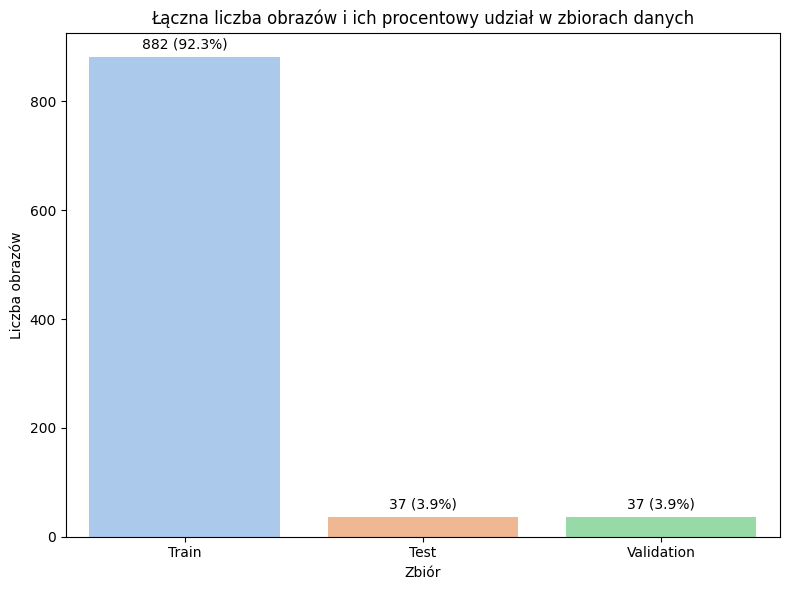

In [3]:
# Liczenie łącznej liczby zdjęć w każdym zbiorze - bez podzialu na klasy
# Liczenie łącznej liczby zdjęć w każdym zbiorze
# Ścieżka główna do folderu DATA
import glob
data_path = 'DATA\\'

# Stworzenie listy dla zbiorów Train, Test, Valid
train_path = os.path.join(data_path, 'Train_Test_Valid', 'Train')
test_path = os.path.join(data_path, 'Train_Test_Valid', 'test')
valid_path = os.path.join(data_path, 'Train_Test_Valid', 'valid')

# Lista klas (typów meduz)
classes = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 
           'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

# Przygotowanie listy plików dla każdej klasy i zbioru (Train, Test, Valid)
train_files = {cls: glob.glob(os.path.join(train_path, cls, '*.jpg')) for cls in classes}
test_files = {cls: glob.glob(os.path.join(test_path, cls, '*.jpg')) for cls in classes}
valid_files = {cls: glob.glob(os.path.join(valid_path, cls, '*.jpg')) for cls in classes}

def total_images_in_dataset(files_dict):
    return sum(len(paths) for paths in files_dict.values())

train_total = total_images_in_dataset(train_files)
test_total = total_images_in_dataset(test_files)
valid_total = total_images_in_dataset(valid_files)
total_all = train_total + test_total + valid_total

print("Łączna liczba zdjęć w zbiorze treningowym:", train_total)
print("Łączna liczba zdjęć w zbiorze testowym:", test_total)
print("Łączna liczba zdjęć w zbiorze walidacyjnym:", valid_total)

total_all = train_total + test_total + valid_total

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Zbiór': ['Train', 'Test', 'Validation'],
    'Liczba obrazów': [train_total, test_total, valid_total],
})

df['% całości'] = df['Liczba obrazów'] / total_all * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Zbiór', y='Liczba obrazów', hue='Zbiór', palette='pastel', legend=False)

for i, row in df.iterrows():
    plt.text(i, row['Liczba obrazów'] + total_all * 0.01, 
             f"{row['Liczba obrazów']} ({row['% całości']:.1f}%)", 
             ha='center', va='bottom', fontsize=10)

plt.title('Łączna liczba obrazów i ich procentowy udział w zbiorach danych')
plt.tight_layout()
plt.show()


### Histogramy kolorów (RGB)

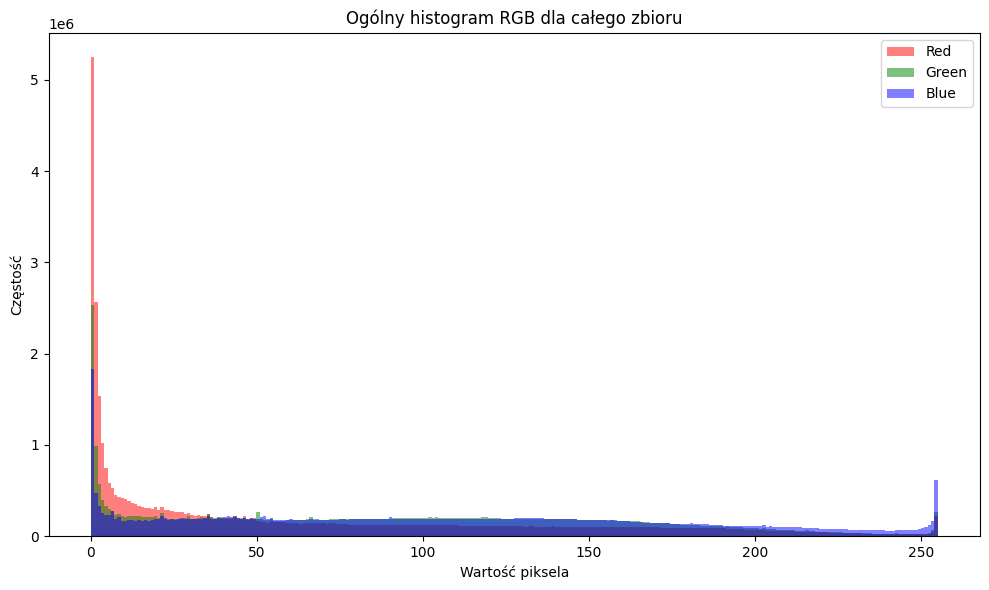

In [4]:
#Histogram RGB 

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Ścieżka do katalogów treningowego, testowego i walidacyjnego
train_path = 'DATA/Train_Test_Valid/Train'
test_path = 'DATA/Train_Test_Valid/Test'
valid_path = 'DATA/Train_Test_Valid/Valid'

# Zbieramy wszystkie pliki .jpg w podkatalogach dla wszystkich trzech zbiorów
image_paths = glob.glob(os.path.join(train_path, '**', '*.jpg'), recursive=True) + \
              glob.glob(os.path.join(test_path, '**', '*.jpg'), recursive=True) + \
              glob.glob(os.path.join(valid_path, '**', '*.jpg'), recursive=True)

# Inicjalizacja pustych list na kanały RGB
all_r = []
all_g = []
all_b = []

# Przechodzimy przez wszystkie obrazy i zbieramy dane RGB
for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Nie można załadować obrazu: {image_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(image)
    all_r.append(r.ravel())
    all_g.append(g.ravel())
    all_b.append(b.ravel())

# Łączymy wszystkie wartości w jeden wektor na każdy kanał
all_r = np.concatenate(all_r)
all_g = np.concatenate(all_g)
all_b = np.concatenate(all_b)

# Tworzymy wykres histogramu
plt.figure(figsize=(10, 6))
plt.hist(all_r, bins=256, color='red', alpha=0.5, label='Red')
plt.hist(all_g, bins=256, color='green', alpha=0.5, label='Green')
plt.hist(all_b, bins=256, color='blue', alpha=0.5, label='Blue')
plt.title('Ogólny histogram RGB dla całego zbioru')
plt.xlabel('Wartość piksela')
plt.ylabel('Częstość')
plt.legend()
plt.tight_layout()
plt.show()


Tworzenie histogramu dla klasy: Moon_jellyfish


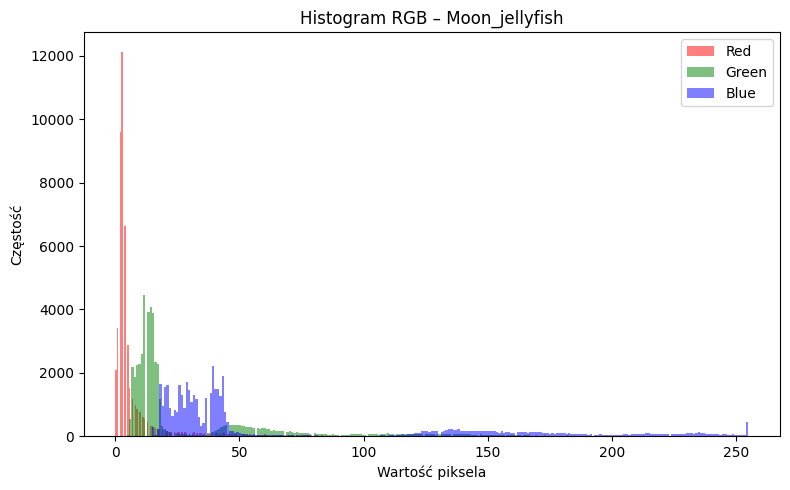

Tworzenie histogramu dla klasy: compass_jellyfish


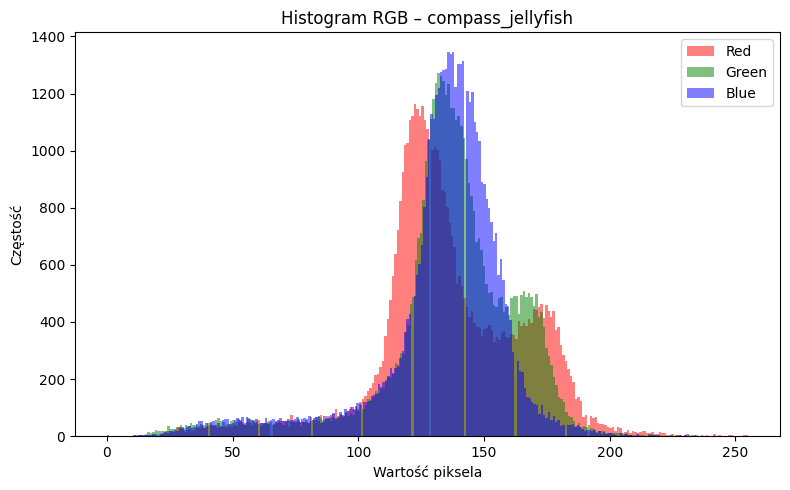

Tworzenie histogramu dla klasy: mauve_stinger_jellyfish


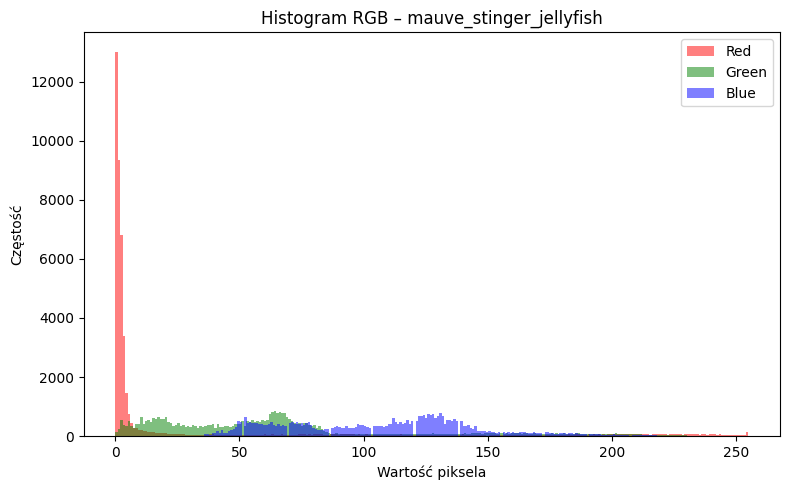

Tworzenie histogramu dla klasy: barrel_jellyfish


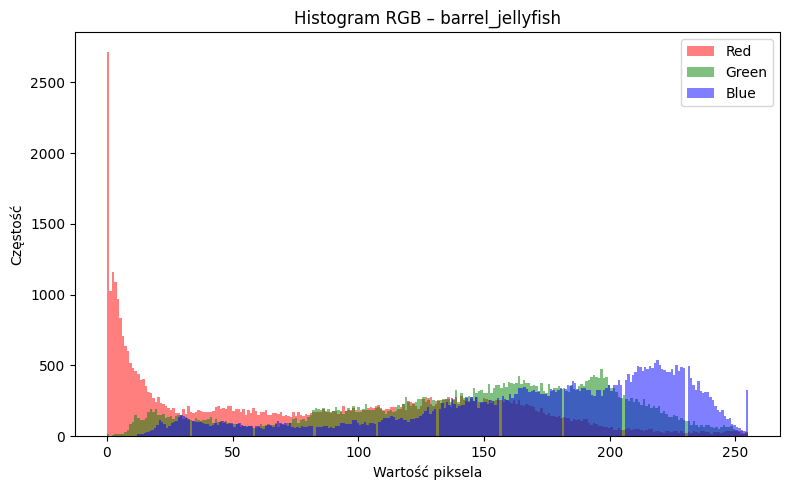

Tworzenie histogramu dla klasy: lions_mane_jellyfish


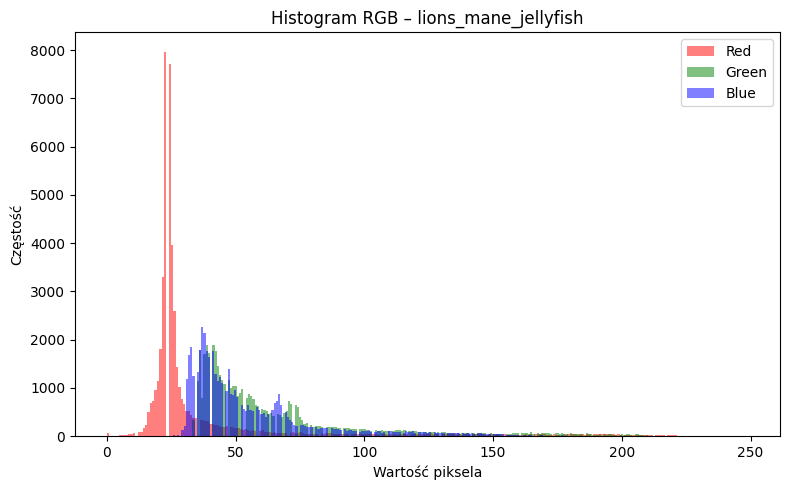

Tworzenie histogramu dla klasy: blue_jellyfish


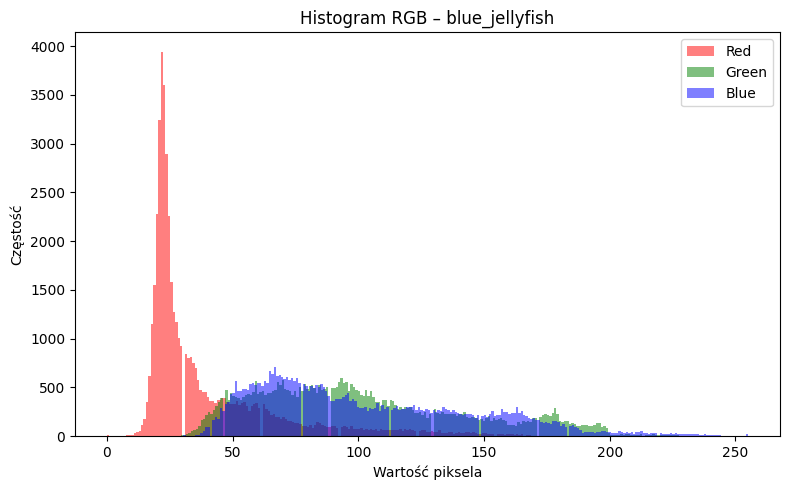

In [5]:
#Hisgramy RGB z podziałem na klasy (żeby zobaczyć czy są jakieś widoczne róznice)

# Ścieżki do katalogów treningowego, testowego i walidacyjnego
train_path = 'DATA/Train_Test_Valid/Train'
test_path = 'DATA/Train_Test_Valid/Test'
valid_path = 'DATA/Train_Test_Valid/Valid'

# Lista klas (folderów) we wszystkich trzech zbiorach
def get_classes(path):
    return [cls for cls in os.listdir(path) if os.path.isdir(os.path.join(path, cls))]

# Funkcja: rysuj histogram RGB dla jednego obrazu
def plot_rgb_histogram(image_path, class_name):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Nie można załadować obrazu: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(image)
    
    plt.figure(figsize=(8, 5))
    plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
    plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
    plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
    plt.title(f'Histogram RGB – {class_name}')
    plt.xlabel('Wartość piksela')
    plt.ylabel('Częstość')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Zbieramy klasy z każdego zbioru
train_classes = get_classes(train_path)
test_classes = get_classes(test_path)
valid_classes = get_classes(valid_path)

# Upewniamy się, że klasy są wspólne dla wszystkich zbiorów
common_classes = list(set(train_classes) & set(test_classes) & set(valid_classes))

# Przechodzimy przez wszystkie wspólne klasy
for class_name in common_classes:
    # Zbieramy ścieżki obrazów dla każdej klasy we wszystkich trzech zbiorach
    class_folders = [
        os.path.join(train_path, class_name),
        os.path.join(test_path, class_name),
        os.path.join(valid_path, class_name)
    ]
    
    image_paths = []
    for class_folder in class_folders:
        image_paths.extend(glob.glob(os.path.join(class_folder, '*.jpg')))
    
    if not image_paths:
        print(f"Brak obrazów dla klasy {class_name}")
        continue

    # Wybieramy pierwszy obraz z każdej klasy do analizy
    sample_image_path = image_paths[0]
    print(f"Tworzenie histogramu dla klasy: {class_name}")
    plot_rgb_histogram(sample_image_path, class_name)


In [7]:
from pathlib import Path
base_dir = Path("DATA/Train_Test_Valid")
backup_dir = Path("DATA/Backup")  #tylko dla jednego wykresu

Znaleziono 6 unikalnych gatunków meduz: ['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']


Przetwarzanie gatunków: 100%|██████████| 18/18 [00:11<00:00,  1.63it/s]


Tabela metryk:


,avg_width,avg_height,avg_aspect_ratio,avg_brightness,avg_unique_colors,avg_blur
barrel_jellyfish,224.0,224.0,1.0,115.61179,6427.6,1630.686691
blue_jellyfish,224.0,224.0,1.0,99.365051,6461.8,1399.825495
compass_jellyfish,224.0,224.0,1.0,90.436771,5883.142857,2161.107161
lions_mane_jellyfish,224.0,224.0,1.0,64.984626,5837.428571,2588.154754
mauve_stinger_jellyfish,224.0,224.0,1.0,100.192471,7866.285714,1888.044867
Moon_jellyfish,224.0,224.0,1.0,61.101058,5812.833333,1289.26556


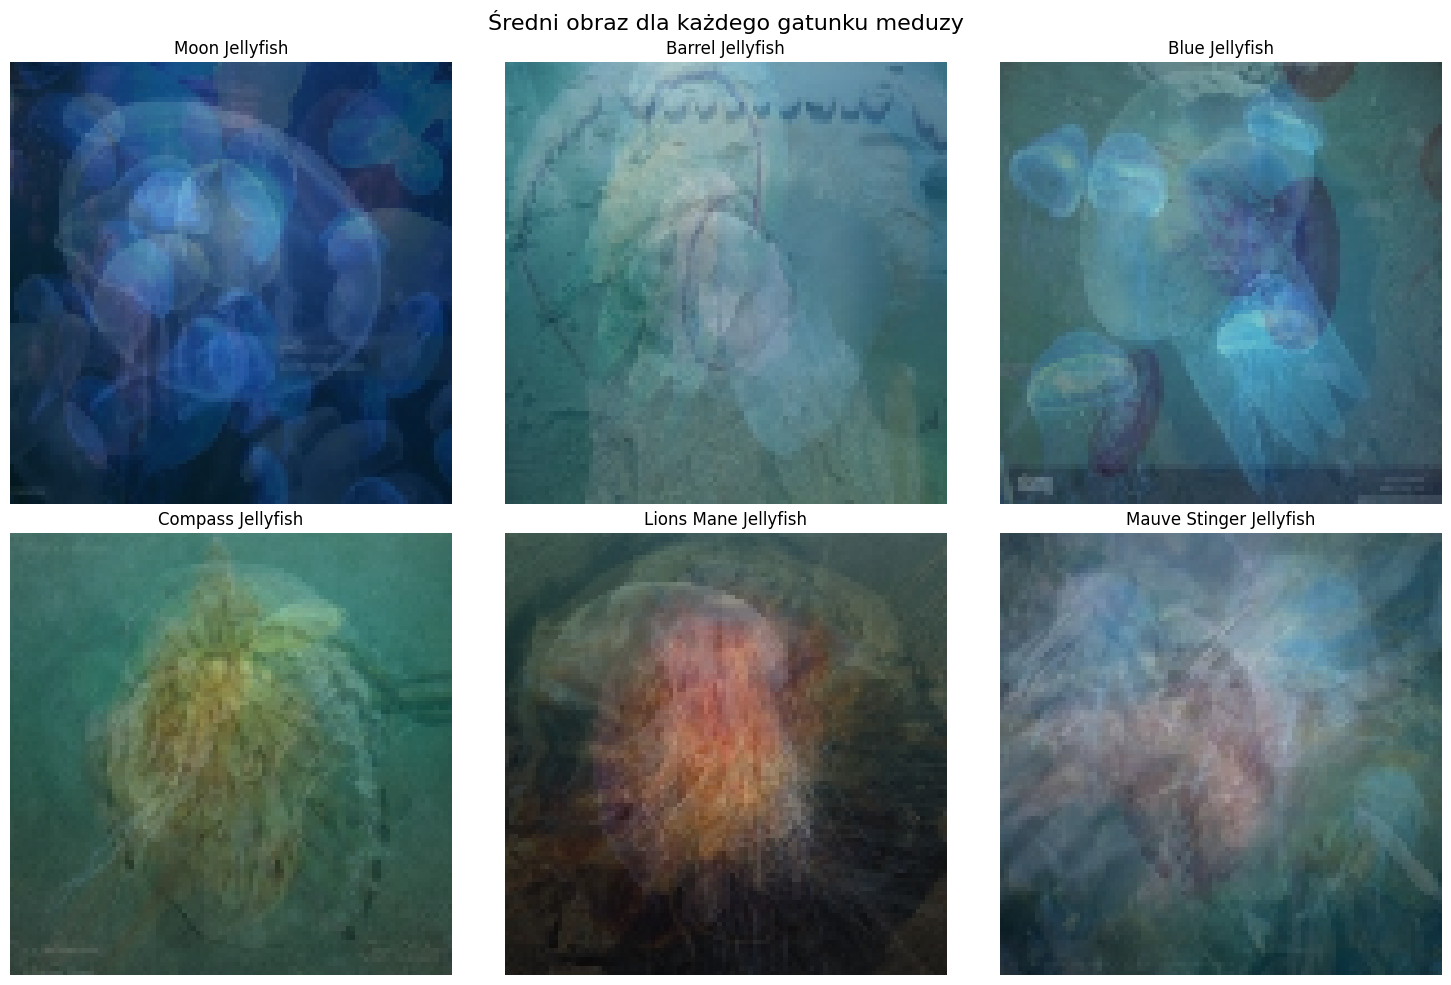

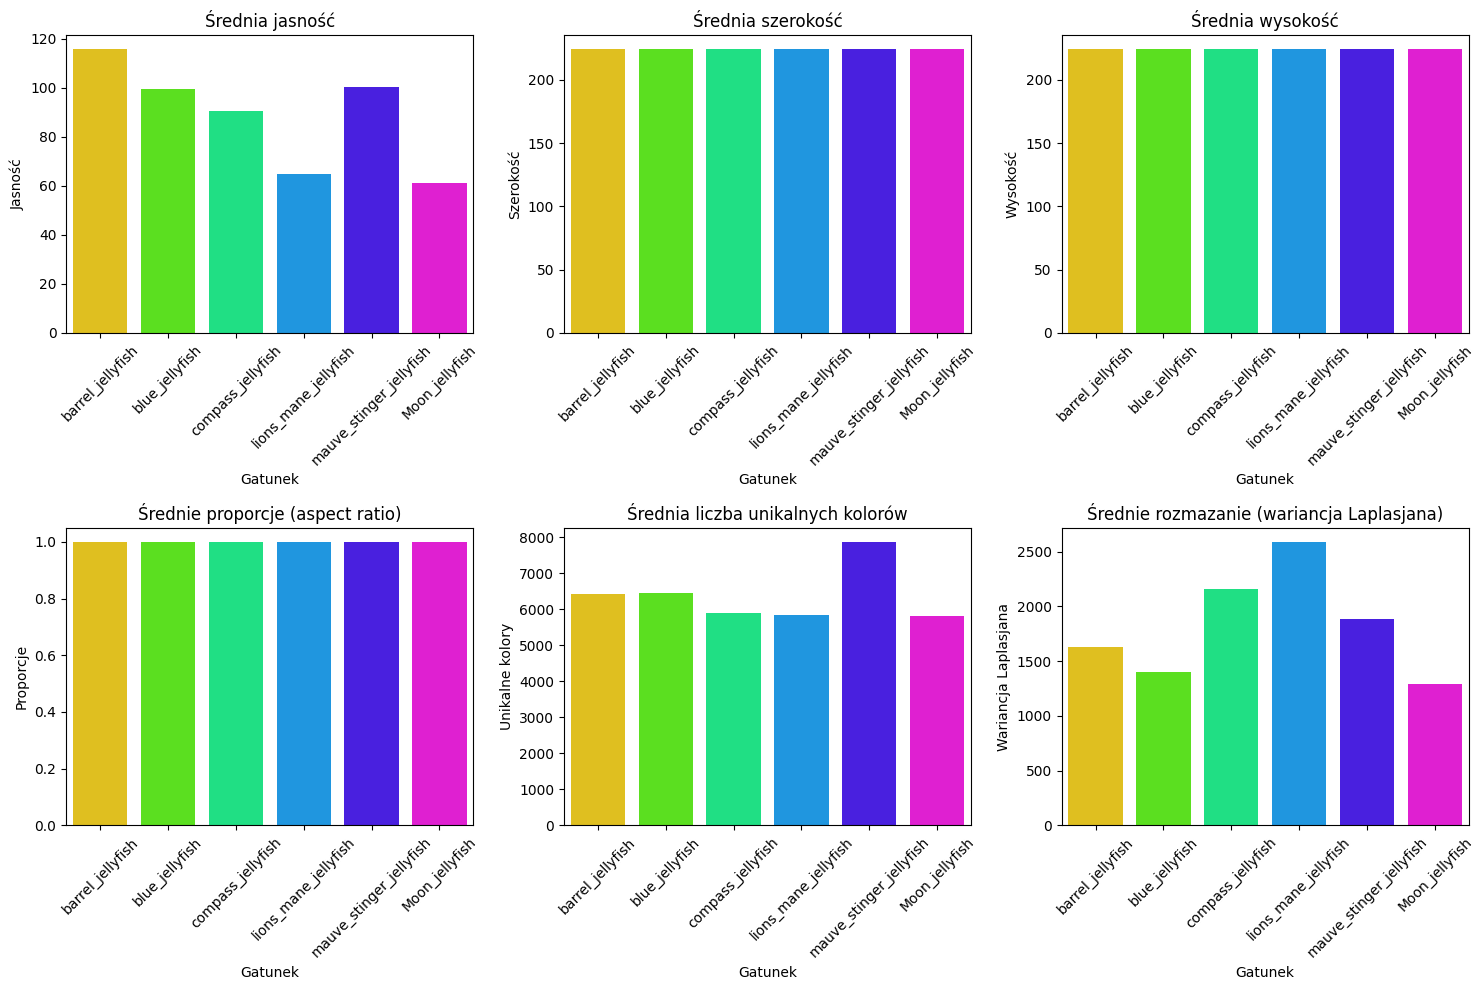

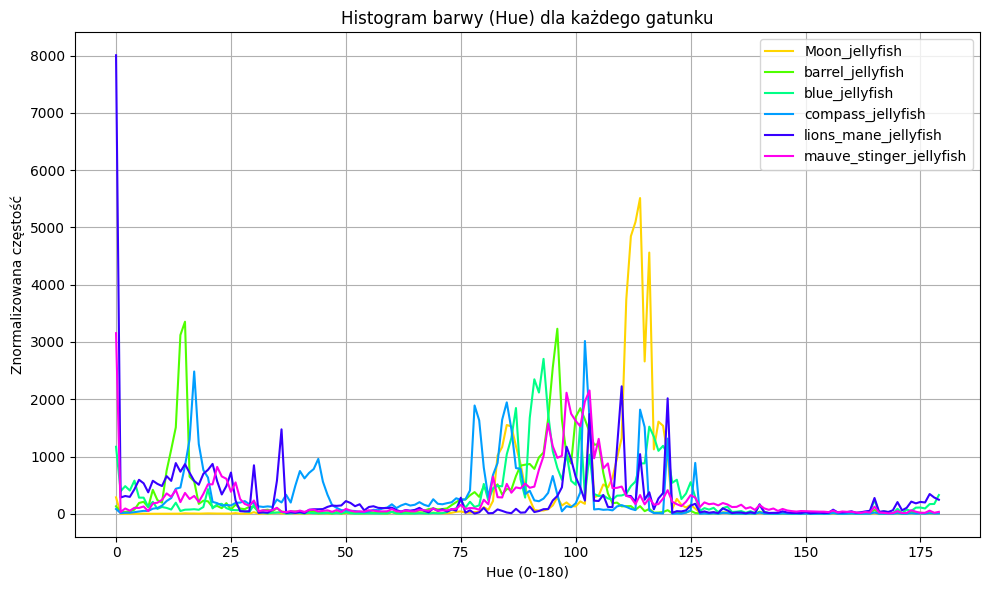

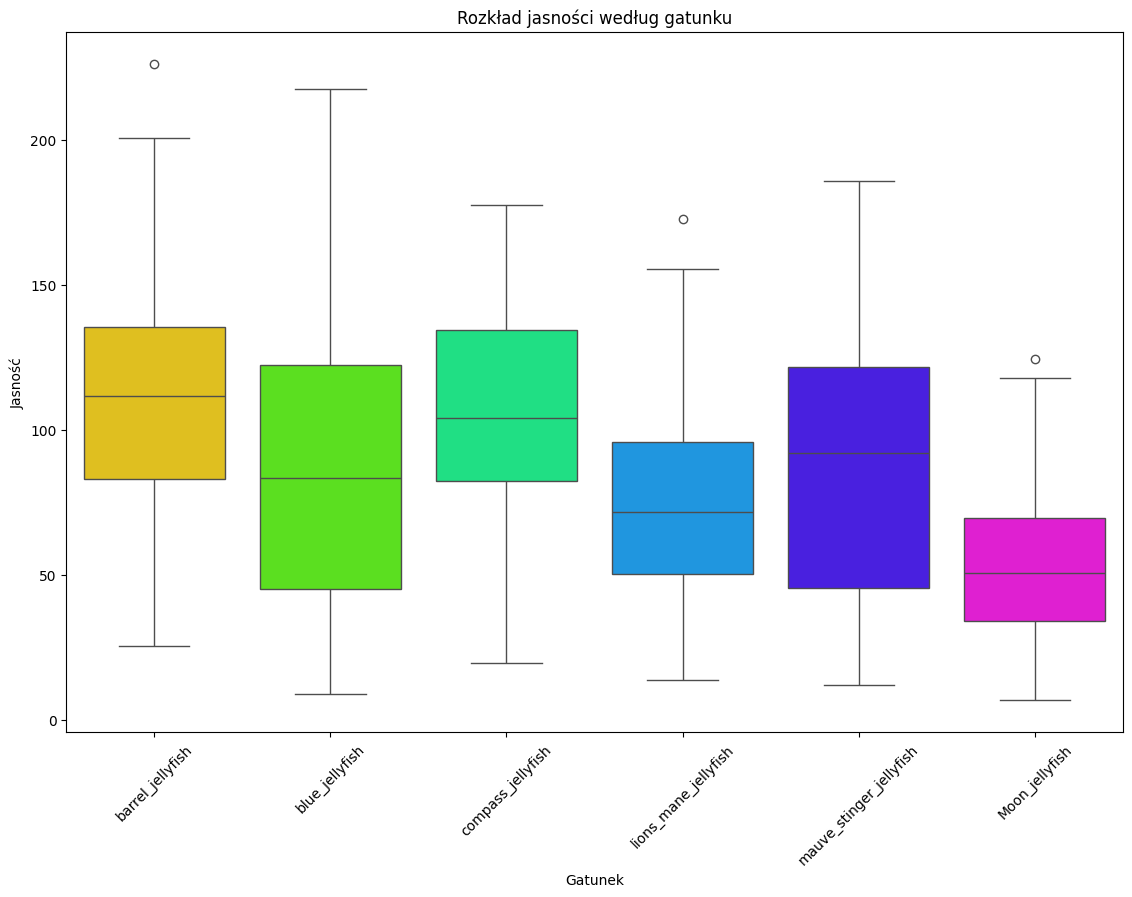

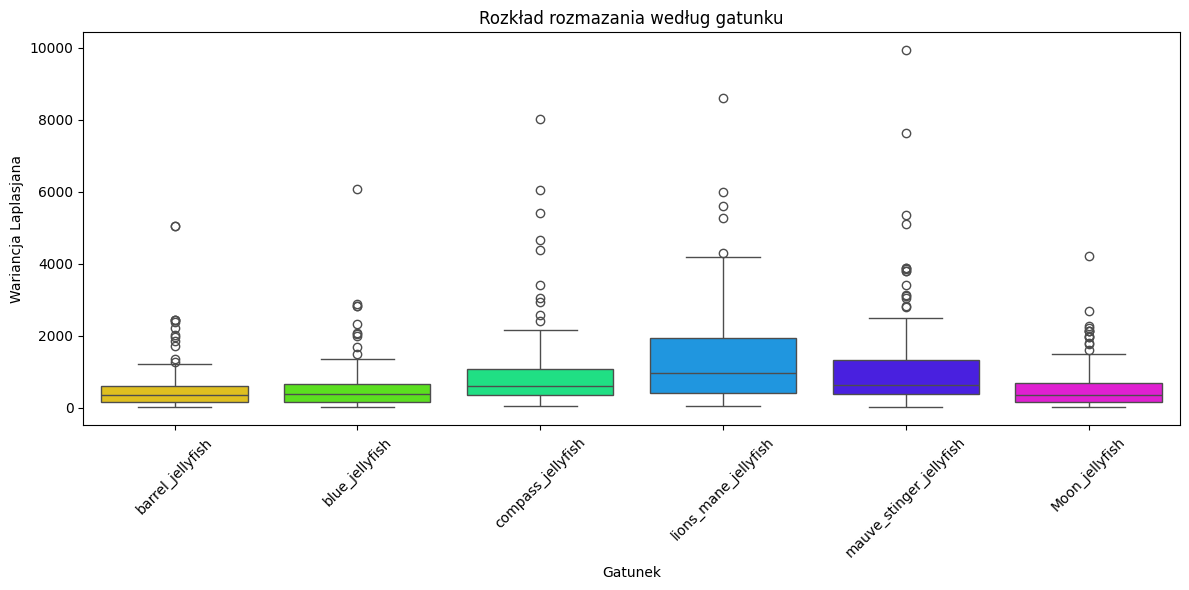


Statystyki szczegółowe dla każdej cechy według gatunku:


brightness                                    \
                               mean        std        min         max   
species                                                                 
Moon_jellyfish            54.441089  26.596361   6.755401  124.540418   
barrel_jellyfish         110.655136  35.270705  25.557916  226.297473   
blue_jellyfish            84.959683  47.736750   8.937480  217.779476   
compass_jellyfish        105.520409  34.650914  19.565210  177.558597   
lions_mane_jellyfish      75.912185  32.763451  13.798728  172.805365   
mauve_stinger_jellyfish   88.054083  45.215212  12.033084  185.819296   

                              width                           height  \
                               mean        std  min  max        mean   
species                                                                
Moon_jellyfish           210.944444  20.485186  179  224  210.944444   
barrel_jellyfish         209.000000  21.281523  179  224  209.000000   
blue_jellyfish           212.037975  19.942876  179  224  212.037975   
compass_jellyfish        212.821656  19.506246  179  224  212.821656   
lions_mane_jellyfish     212.396226  19.747783  179  224  212.396226   
mauve_stinger_jellyfish  212.475610  19.701593  179  224  212.475610   

                                             aspect_ratio                 \
                               std  min  max         mean  std  min  max   
species                                                                    
Moon_jellyfish           20.485186  179  224          1.0  0.0  1.0  1.0   
barrel_jellyfish         21.281523  179  224          1.0  0.0  1.0  1.0   
blue_jellyfish           19.942876  179  224          1.0  0.0  1.0  1.0   
compass_jellyfish        19.506246  179  224          1.0  0.0  1.0  1.0   
lions_mane_jellyfish     19.747783  179  224          1.0  0.0  1.0  1.0   
mauve_stinger_jellyfish  19.701593  179  224          1.0  0.0  1.0  1.0   

                                blur                                       
                                mean          std        min          max  
species                                                                    
Moon_jellyfish            556.454628   614.312925  24.547427  4221.199896  
barrel_jellyfish          535.015392   722.439212  28.676676  5038.260798  
blue_jellyfish            565.569759   709.902021  10.681421  6079.320627  
compass_jellyfish         920.995328  1087.102056  50.121651  8017.759666  
lions_mane_jellyfish     1379.779870  1337.291590  54.481960  8608.930092  
mauve_stinger_jellyfish  1115.585777  1330.226112   5.276148  9938.208383

In [8]:
#Podstawowe metryki obrazów meduz z podziałem na klasy (znów żeby zobaczyć czy są jakieś widoczne różnice)
import os
from pathlib import Path
from collections import defaultdict
from tqdm import tqdm

# Nowa ścieżka bazowa
base_path = Path("DATA/Backup")

# Wyszukanie wszystkich folderów gatunków w Train, Test i Valid
species_dirs = [d for subset in base_path.iterdir() if subset.is_dir()
                for d in subset.iterdir() if d.is_dir()]
species_names = sorted(set(d.name for d in species_dirs))  # unikalne gatunki
print(f"Znaleziono {len(species_names)} unikalnych gatunków meduz: {species_names}")

metrics = defaultdict(dict)

colors = sns.color_palette("hsv", len(species_names))


for species_dir in tqdm(species_dirs, desc="Przetwarzanie gatunków"):
    species = species_dir.name
    image_paths = list(species_dir.glob("*.jpg"))
    
    widths, heights, aspect_ratios, brightness_vals, unique_colors, blur_vals = [], [], [], [], [], []
    hsv_hist_total = np.zeros((180, 1))  # tylko hue do histogramu
    avg_image = None

    for path in image_paths:
        img = cv2.imread(str(path))
        if img is None:
            print(f"Nie można wczytać obrazu: {path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)
        aspect_ratios.append(w / h)  
        brightness_vals.append(np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))

        # HSV histogram
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        hist_hue = cv2.calcHist([hsv], [0], None, [180], [0, 180])
        hsv_hist_total += hist_hue

        # Średni obraz
        img = cv2.resize(img, (100, 100))  
        if avg_image is None:
            avg_image = np.zeros_like(img, dtype=np.float64)
        avg_image += img / len(image_paths)

        # Liczba unikalnych kolorów
        unique_colors.append(len(np.unique(img.reshape(-1, 3), axis=0)))

        # Metryka rozmazania 
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        laplacian_var = cv2.Laplacian(gray_img, cv2.CV_64F).var()
        blur_vals.append(laplacian_var)

   
    metrics[species]['avg_width'] = np.mean(widths)
    metrics[species]['avg_height'] = np.mean(heights)
    metrics[species]['avg_aspect_ratio'] = np.mean(aspect_ratios)
    metrics[species]['avg_brightness'] = np.mean(brightness_vals)
    metrics[species]['avg_unique_colors'] = np.mean(unique_colors)
    metrics[species]['avg_blur'] = np.mean(blur_vals)  
    metrics[species]['hue_hist'] = hsv_hist_total / len(image_paths)
    metrics[species]['avg_image'] = avg_image.astype(np.uint8)


df_metrics = pd.DataFrame(metrics).T
df_metrics = df_metrics[['avg_width', 'avg_height', 'avg_aspect_ratio', 'avg_brightness', 'avg_unique_colors', 'avg_blur']]
print("\nTabela metryk:")
display(df_metrics)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for idx, species in enumerate(species_names):
    axes[idx].imshow(metrics[species]['avg_image'])
    axes[idx].axis('off')
    axes[idx].set_title(species.replace("_", " ").title())
fig.suptitle("Średni obraz dla każdego gatunku meduzy", fontsize=16)
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_brightness'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnia jasność')
plt.xlabel('Gatunek')
plt.ylabel('Jasność')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_width'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnia szerokość')
plt.xlabel('Gatunek')
plt.ylabel('Szerokość')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_height'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnia wysokość')
plt.xlabel('Gatunek')
plt.ylabel('Wysokość')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_aspect_ratio'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnie proporcje (aspect ratio)')
plt.xlabel('Gatunek')
plt.ylabel('Proporcje')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_unique_colors'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnia liczba unikalnych kolorów')
plt.xlabel('Gatunek')
plt.ylabel('Unikalne kolory')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)  
sns.barplot(x=df_metrics.index, y=df_metrics['avg_blur'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('Średnie rozmazanie (wariancja Laplasjana)')
plt.xlabel('Gatunek')
plt.ylabel('Wariancja Laplasjana')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#  Histogramy Hue (HSV) dla każdego gatunku
plt.figure(figsize=(10, 6))
for idx, species in enumerate(species_names):
    plt.plot(metrics[species]['hue_hist'], label=species, color=colors[idx])
plt.title('Histogram barwy (Hue) dla każdego gatunku')
plt.xlabel('Hue (0-180)')
plt.ylabel('Znormalizowana częstość')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

data = []
for species_dir in species_dirs:
    species = species_dir.name
    image_paths = list(species_dir.glob("*.jpg"))
    for path in image_paths:
        img = cv2.imread(str(path))
        if img is None:
            print(f"Nie można wczytać obrazu: {path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]
        data.append({
            'species': species,
            'width': w,
            'height': h,
            'aspect_ratio': w / h,
            'brightness': np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)),
            'blur': cv2.Laplacian(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.CV_64F).var()  
        })

df_individual = pd.DataFrame(data)

plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='brightness', hue='species', data=df_individual, palette=colors, legend=False)
plt.title('Rozkład jasności według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Jasność')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='blur', hue='species', data=df_individual, palette=colors, legend=False)
plt.title('Rozkład rozmazania według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Wariancja Laplasjana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statystyki szczegółowe
print("\nStatystyki szczegółowe dla każdej cechy według gatunku:")
stats = df_individual.groupby('species').agg({
    'brightness': ['mean', 'std', 'min', 'max'],
    'width': ['mean', 'std', 'min', 'max'],
    'height': ['mean', 'std', 'min', 'max'],
    'aspect_ratio': ['mean', 'std', 'min', 'max'],
    'blur': ['mean', 'std', 'min', 'max']  
})
display(stats)

#Hue reprezentuje odcień koloru, co jest bardziej intuicyjne niż histogramy RGB w kontekście analizy kolorystycznej.
#Wizualizuje je na jednym wykresie, co pozwala porównać rozkład kolorów między gatunkami.

#Średni obraz: Kod generuje średni obraz dla każdego gatunku, co jest unikalną wizualizacją, pomagającą zobaczyć "typowy" wygląd meduzy danego gatunku.
#Liczba unikalnych kolorów: Oblicza średnią liczbę unikalnych kolorów, co może wskazywać na różnorodność kolorystyczną obrazów.
#Tabela metryk: podsumowuje kluczowe cechy, co jest przydatne do dalszej analizy.
#Aspekt ratio: Oblicza średnie proporcje obrazów, czyli stosunek szerokości do wysokości

Przetwarzanie obrazów: 100%|██████████| 956/956 [00:10<00:00, 87.29it/s]

Statystyki zbioru (bez podziału na klasy):


,width,height,aspect_ratio,brightness,unique_colors,blur
count,956.000000,956.000000,956.0,956.000000,956.000000,956.000000
mean,211.620293,211.620293,1.0,86.383785,6070.489540,1676.489514
std,20.106032,20.106032,0.0,42.036301,1835.821308,1614.476292
min,179.000000,179.000000,1.0,6.755401,1537.000000,21.866674
25%,179.000000,179.000000,1.0,51.276223,4700.500000,625.462271
50%,224.000000,224.000000,1.0,83.532435,5975.000000,1192.091678
75%,224.000000,224.000000,1.0,117.254439,7379.250000,2152.679158
max,224.000000,224.000000,1.0,226.297473,9902.000000,12035.001968


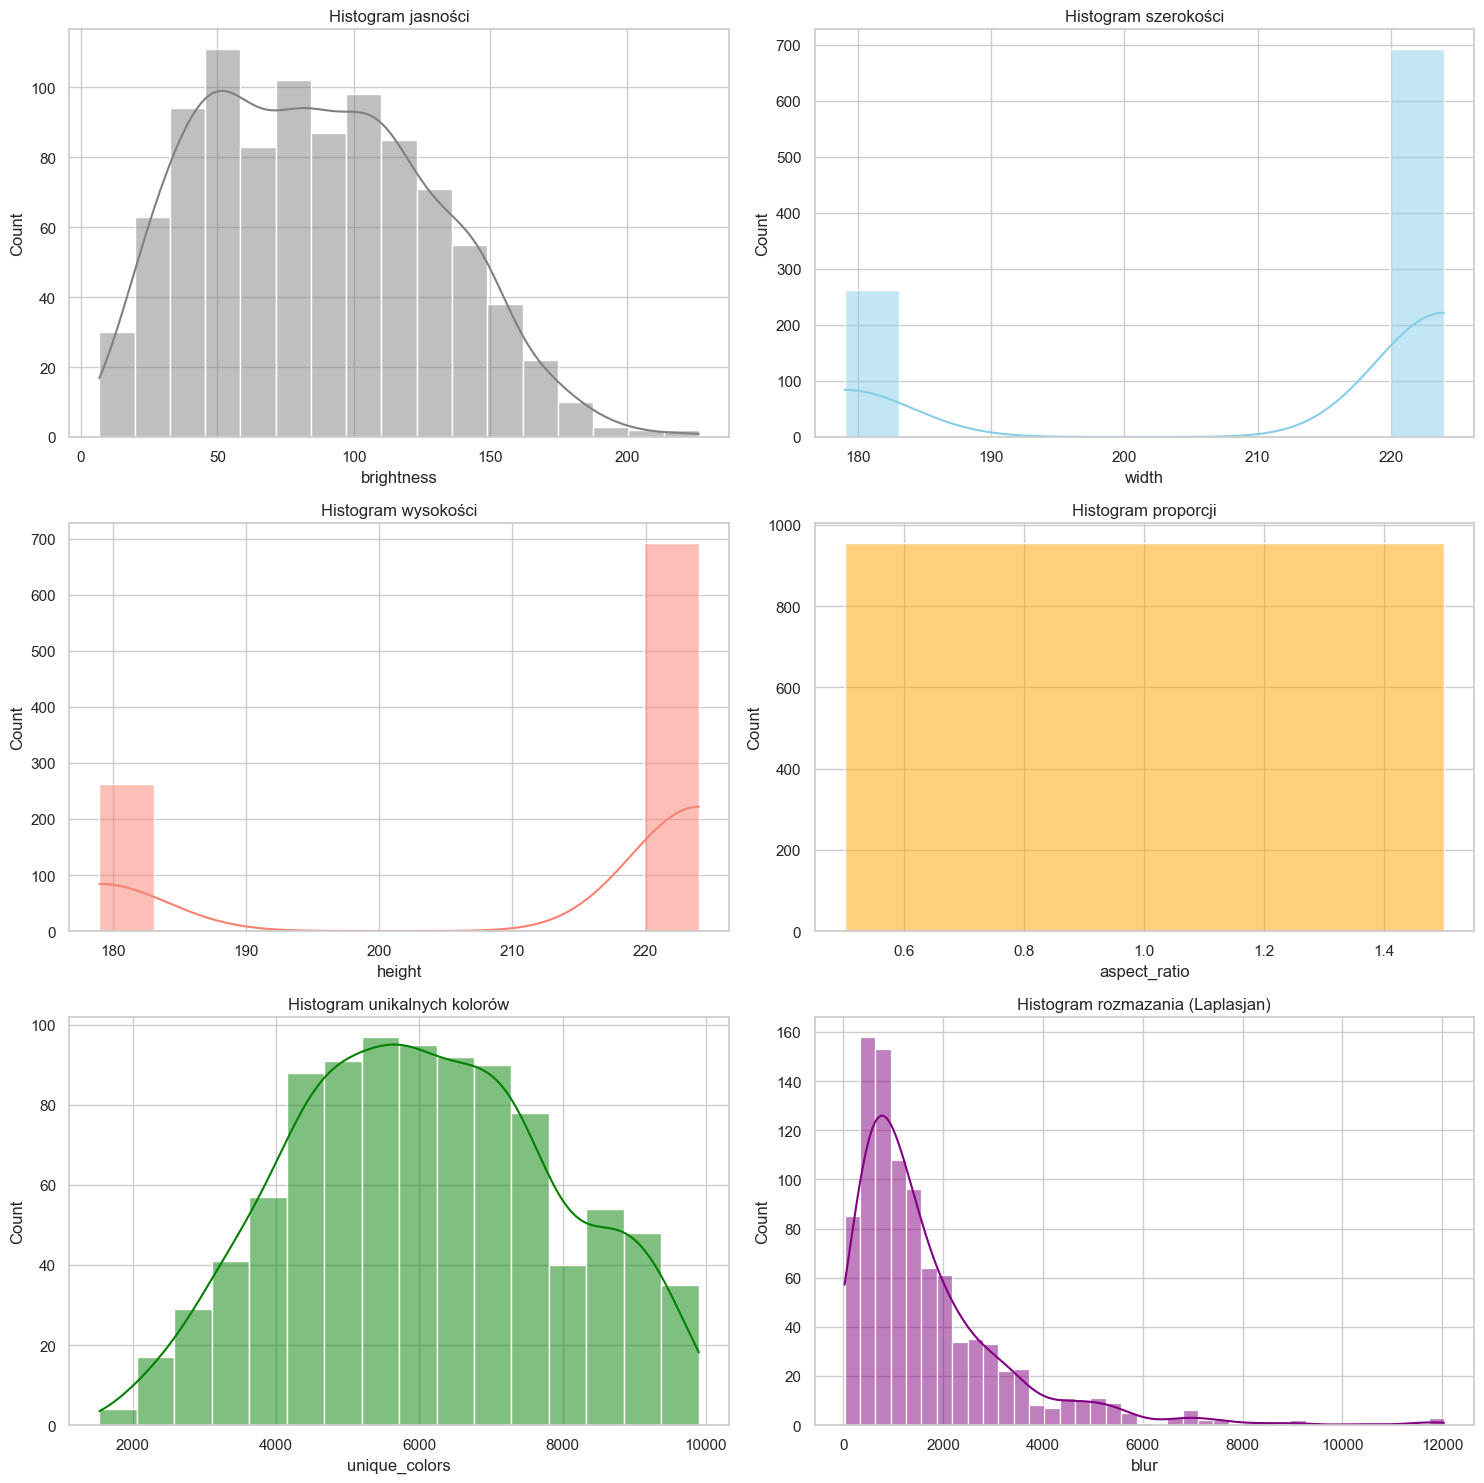

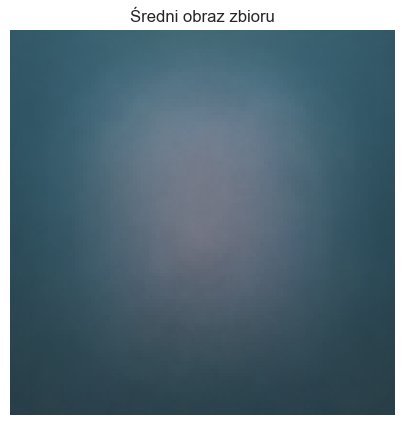

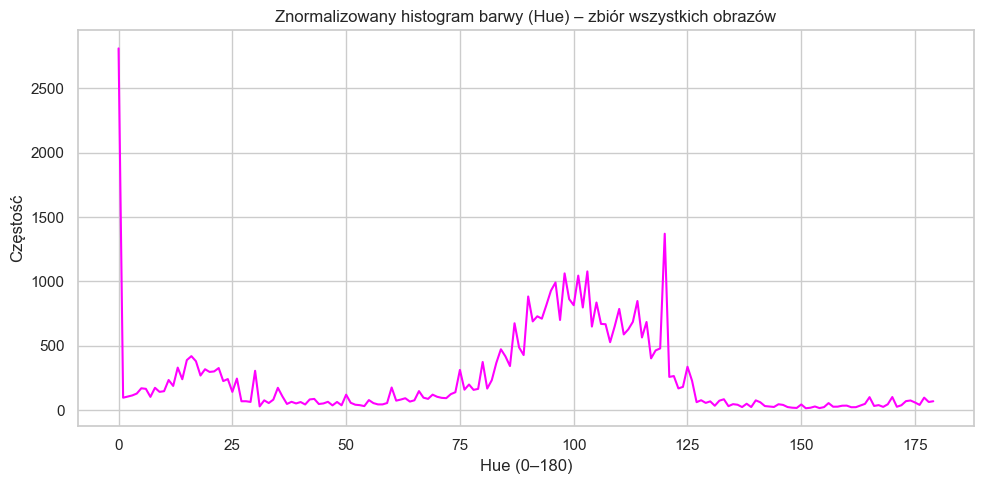

In [9]:
#Podstawowe statystyki calego zbioru
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob

# Ścieżki do folderów
train_path = 'DATA/Backup/Train'
test_path = 'DATA/Backup/Test'
valid_path = 'DATA/Backup/Valid'

# Zbieramy wszystkie pliki .jpg w podkatalogach dla wszystkich trzech zbiorów
image_paths = glob.glob(os.path.join(train_path, '**', '*.jpg'), recursive=True) + \
              glob.glob(os.path.join(test_path, '**', '*.jpg'), recursive=True) + \
              glob.glob(os.path.join(valid_path, '**', '*.jpg'), recursive=True)

# Inicjalizacja
widths, heights, aspect_ratios, brightness_vals, unique_colors, blur_vals = [], [], [], [], [], []
hue_hist_total = np.zeros((180, 1))
avg_image = None
count = 0

# Przetwarzanie obrazów
for path in tqdm(image_paths, desc="Przetwarzanie obrazów"):
    img = cv2.imread(str(path))
    if img is None:
        print(f"Nie można wczytać obrazu: {path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    widths.append(w)
    heights.append(h)
    aspect_ratios.append(w / h)
    brightness_vals.append(np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))

    # Histogram Hue
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hue_hist_total += cv2.calcHist([hsv], [0], None, [180], [0, 180])

    # Średni obraz (przeskalowany)
    img_resized = cv2.resize(img, (100, 100))
    if avg_image is None:
        avg_image = np.zeros_like(img_resized, dtype=np.float64)
    avg_image += img_resized / len(image_paths)

    # Unikalne kolory
    unique_colors.append(len(np.unique(img_resized.reshape(-1, 3), axis=0)))

    # Rozmazanie
    gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
    blur_vals.append(cv2.Laplacian(gray, cv2.CV_64F).var())

# Przekształć średni obraz
avg_image = avg_image.astype(np.uint8)
hue_hist_total /= len(image_paths)

# Tworzymy ramkę danych i statystyki
df = pd.DataFrame({
    'width': widths,
    'height': heights,
    'aspect_ratio': aspect_ratios,
    'brightness': brightness_vals,
    'unique_colors': unique_colors,
    'blur': blur_vals
})

# Statystyki zbioru
print("Statystyki zbioru (bez podziału na klasy):")
display(df.describe())

# Wykresy
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Zwiększono przestrzeń i zmieniono układ

# Histogramy danych
sns.histplot(df['brightness'], kde=True, ax=axes[0, 0], color='gray').set_title('Histogram jasności')
sns.histplot(df['width'], kde=True, ax=axes[0, 1], color='skyblue').set_title('Histogram szerokości')
sns.histplot(df['height'], kde=True, ax=axes[1, 0], color='salmon').set_title('Histogram wysokości')
sns.histplot(df['aspect_ratio'], kde=True, ax=axes[1, 1], color='orange').set_title('Histogram proporcji')
sns.histplot(df['unique_colors'], kde=True, ax=axes[2, 0], color='green').set_title('Histogram unikalnych kolorów')
sns.histplot(df['blur'], kde=True, ax=axes[2, 1], color='purple').set_title('Histogram rozmazania (Laplasjan)')

plt.tight_layout()
plt.show()

# Średni obraz
plt.figure(figsize=(5, 5))
plt.imshow(avg_image)
plt.title("Średni obraz zbioru")
plt.axis('off')
plt.show()

# Histogram Hue
plt.figure(figsize=(10, 5))
plt.plot(hue_hist_total, color='magenta')
plt.title("Znormalizowany histogram barwy (Hue) – zbiór wszystkich obrazów")
plt.xlabel("Hue (0–180)")
plt.ylabel("Częstość")
plt.grid(True)
plt.tight_layout()
plt.show()

#wszystkie zdjecia są kwadratowe (aspect ratio), niektóre mają rozmiar 179x179 inne 224x224 więc zmienimy je do jednej wartosci podczas inżynierii cech

### Do wykrywania anomalii weżmiemy pod uwagę tylko 3 najważniejsze cechy, które są zmienne, ponieważ:
- width i height:
width i height mają bardzo małą wariancję, ponieważ obrazy zostały przeskalowane do podobnych rozmiarów (wszystkie są kwadratowe, co potwierdza aspect_ratio). Te cechy nie są użyteczne do wykrywania anomalii.
- aspect_ratio:
Proporcje są zawsze równe 1.0 (wszystkie obrazy są kwadratowe), a odchylenie standardowe wynosi 0.
aspect_ratio jest całkowicie niezmienny i nie nadaje się do wykrywania anomalii.
## Zatem interesują nas:
- brightness:
- unique_colors:
- blur

In [10]:
#Wykrywanie anomalii - Isolation Forest + Z-score
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

# 🧮 Oblicz unique_colors jeśli nie istnieje
if 'unique_colors' not in df_individual.columns:
    unique_colors_list = []
    image_paths = list(Path("DATA/Train_Test_Valid").rglob("*.jpg"))
    for path in image_paths:
        img = cv2.imread(str(path))
        if img is None:
            unique_colors_list.append(np.nan)
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        unique_colors = len(np.unique(img.reshape(-1, 3), axis=0))
        unique_colors_list.append(unique_colors)
    df_individual['unique_colors'] = unique_colors_list[:len(df_individual)]

# 📊 Dane wejściowe
features = ['brightness', 'unique_colors', 'blur']
df_anomaly_input = df_individual[features].dropna().copy()

# 🧪 Isolation Forest
iso_forest = IsolationForest(contamination=0.03, random_state=42)
iso_preds = iso_forest.fit_predict(df_anomaly_input)
df_anomaly_input['iso_pred'] = iso_preds  # -1 to anomalia

# 🧮 Z-score
z_scores = pd.DataFrame(zscore(df_anomaly_input[features]), columns=features, index=df_anomaly_input.index)
z_threshold = 4
z_anomaly_mask = (np.abs(z_scores) > z_threshold)

# ✍️ Dodaj opis przyczyn
def anomaly_reason(row):
    reasons = [f"{col} z={row[col]:.2f}" for col in features if abs(row[col]) > z_threshold]
    return ", ".join(reasons)

df_anomaly_input['z_anomaly'] = z_anomaly_mask.any(axis=1)
df_anomaly_input['anomaly_reason'] = z_scores.apply(anomaly_reason, axis=1)

# 📌 Finalna filtracja: anomalia wg IsolationForest + odstająca wg z-score
df_anomalies = df_anomaly_input[(df_anomaly_input['iso_pred'] == -1) & (df_anomaly_input['z_anomaly'])].copy()
df_anomalies = df_anomalies.join(df_individual.loc[df_anomalies.index, ['species']])

# 📋 Wyniki
print(f"\n📌 Wykryto {len(df_anomalies)} anomalii:\n")
for _, row in df_anomalies.iterrows():
    print(f"- Gatunek: {row['species']}, Jasność: {row['brightness']:.1f}, "
          f"Kolory: {row['unique_colors']}, Rozmazanie: {row['blur']:.1f}")
    print(f"  🔎 Powód: {row['anomaly_reason']}\n")

# 👉 Alternatywnie (dla DataFrame):
display(df_anomalies[['species', 'brightness', 'unique_colors', 'blur', 'anomaly_reason']])

#Jest kilkanaście obrazów znacznie bardziej rozmytych od pozostałych, co może sugerować, że są to zdjęcia o niskiej jakości lub źle wykonane



📌 Wykryto 12 anomalii:

- Gatunek: compass_jellyfish, Jasność: 148.2, Kolory: 35448, Rozmazanie: 6062.3
  🔎 Powód: blur z=4.92

- Gatunek: blue_jellyfish, Jasność: 143.7, Kolory: 28128, Rozmazanie: 6079.3
  🔎 Powód: blur z=4.93

- Gatunek: compass_jellyfish, Jasność: 146.5, Kolory: 25143, Rozmazanie: 8017.8
  🔎 Powód: blur z=6.76

- Gatunek: compass_jellyfish, Jasność: 167.8, Kolory: 17124, Rozmazanie: 5411.4
  🔎 Powód: blur z=4.30

- Gatunek: lions_mane_jellyfish, Jasność: 48.6, Kolory: 16793, Rozmazanie: 5268.8
  🔎 Powód: blur z=4.17

- Gatunek: lions_mane_jellyfish, Jasność: 38.9, Kolory: 11412, Rozmazanie: 6000.8
  🔎 Powód: blur z=4.86

- Gatunek: lions_mane_jellyfish, Jasność: 58.3, Kolory: 15408, Rozmazanie: 8608.9
  🔎 Powód: blur z=7.32

- Gatunek: lions_mane_jellyfish, Jasność: 126.4, Kolory: 38165, Rozmazanie: 5611.8
  🔎 Powód: blur z=4.49

- Gatunek: mauve_stinger_jellyfish, Jasność: 45.9, Kolory: 18627, Rozmazanie: 5367.7
  🔎 Powód: blur z=4.26

- Gatunek: mauve_stinger_jel

,species,brightness,unique_colors,blur,anomaly_reason
12,compass_jellyfish,148.177595,35448,6062.294585,blur z=4.92
216,blue_jellyfish,143.743722,28128,6079.320627,blur z=4.93
347,compass_jellyfish,146.469448,25143,8017.759666,blur z=6.76
393,compass_jellyfish,167.781062,17124,5411.444477,blur z=4.30
516,lions_mane_jellyfish,48.620596,16793,5268.831167,blur z=4.17
561,lions_mane_jellyfish,38.860866,11412,6000.805336,blur z=4.86
569,lions_mane_jellyfish,58.273556,15408,8608.930092,blur z=7.32
582,lions_mane_jellyfish,126.422891,38165,5611.773277,blur z=4.49
638,mauve_stinger_jellyfish,45.882314,18627,5367.710379,blur z=4.26
661,mauve_stinger_jellyfish,178.971819,33315,5118.459805,blur z=4.03


In [12]:
#Weryfikacja poprawnosci zdjęć - sprawdzenie rozmiaru, wczytania, wymiarów, liczby kanałów, wartości pikseli, rozmiaru pliku w stosunku do wymiarów

from pathlib import Path
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

# 📊 Ustawienia wyświetlania Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 📋 Lista problematycznych plików
problematic_files = []

# 📂 Foldery zbiorów
base_dirs = ["DATA/Train_Test_Valid/Train", "DATA/Train_Test_Valid/Valid", "DATA/Train_Test_Valid/Test"]

# 🔁 Iteracja przez wszystkie podkatalogi datasetu
for base_dir in base_dirs:
    base_path = Path(base_dir)
    species_dirs = [d for d in base_path.iterdir() if d.is_dir()]
    
    for species_dir in tqdm(species_dirs, desc=f"Przetwarzanie: {base_dir}"):
        species = species_dir.name
        image_paths = list(species_dir.glob("*.jpg"))

        for path in image_paths:
            file_size = path.stat().st_size
            if file_size == 0:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': 'Zerowy rozmiar pliku'
                })
                continue

            img = cv2.imread(str(path))
            if img is None:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': 'Nie można wczytać obrazu (uszkodzony plik)'
                })
                continue

            h, w = img.shape[:2]
            if h == 0 or w == 0:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': 'Obraz ma zerowe wymiary'
                })
                continue

            if len(img.shape) != 3 or img.shape[2] != 3:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': 'Nieprawidłowa liczba kanałów (obraz nie jest RGB)'
                })
                continue

            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            mean_brightness = np.mean(gray_img)
            if mean_brightness < 10 or mean_brightness > 245:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': f'Nietypowe wartości pikseli (średnia jasność: {mean_brightness:.2f})'
                })
                continue

            expected_size = (h * w * 3) / 1024  # w KB
            if file_size < expected_size * 0.1:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': f'Zbyt mały rozmiar pliku ({file_size:.2f} B) w stosunku do ({w}x{h})'
                })

# 📊 Wynik
df_problematic = pd.DataFrame(problematic_files)
print("\n📋 Problematyczne pliki:")
if not df_problematic.empty:
    print(df_problematic)
else:
    print("✅ Nie znaleziono problematycznych plików.")



Przetwarzanie: DATA/Train_Test_Valid/Test: 100%|██████████| 6/6 [00:00<00:00, 224.64it/s]


📋 Problematyczne pliki:
     set         species  \
0  Train  blue_jellyfish   
1  Train  blue_jellyfish   
2  Train  Moon_jellyfish   
3  Train  Moon_jellyfish   

                                                       path  \
0   DATA\Train_Test_Valid\Train\blue_jellyfish\aug-6-09.jpg   
1  DATA\Train_Test_Valid\Train\blue_jellyfish\aug-62-11.jpg   
2  DATA\Train_Test_Valid\Train\Moon_jellyfish\aug-64-25.jpg   
3  DATA\Train_Test_Valid\Train\Moon_jellyfish\aug-90-56.jpg   

                                                issue  
0  Nietypowe wartości pikseli (średnia jasność: 8.94)  
1  Nietypowe wartości pikseli (średnia jasność: 9.97)  
2  Nietypowe wartości pikseli (średnia jasność: 9.96)  
3  Nietypowe wartości pikseli (średnia jasność: 6.76)  


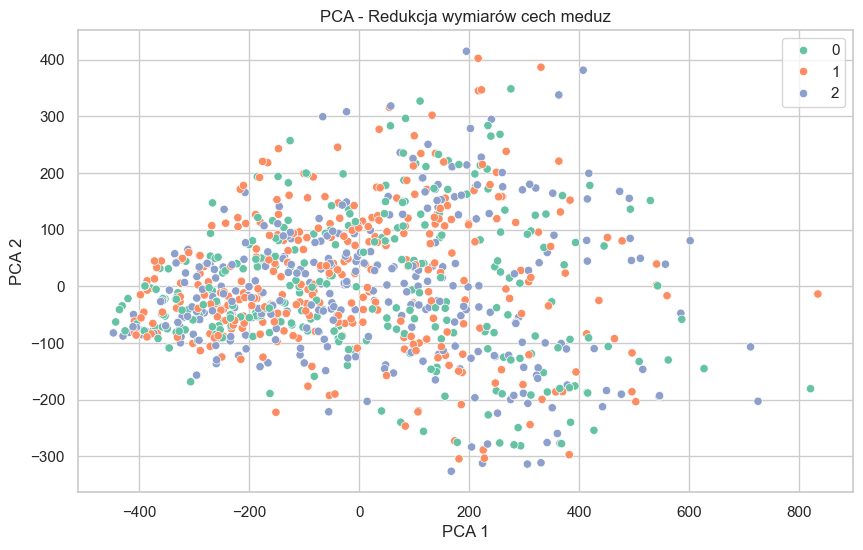

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pathlib import Path

# Ścieżka do folderu z obrazami meduz
input_base = Path("DATA/Train_Test_Valid")
image_paths = list(input_base.rglob("*.jpg"))

# Wczytywanie obrazów jako dane
images = []
for img_path in image_paths:
    img = cv2.imread(str(img_path))
    if img is not None:
        img_resized = cv2.resize(img, (224, 224))  # Zmiana rozmiaru do 224x224
        images.append(img_resized)

# Konwersja do tablicy numpy
X = np.array(images)

# Reshape, by stworzyć macierz (liczba_obrazów, liczba_cech)
# Każdy obraz jest teraz wektorem o długości 224*224*3
X_reshaped = X.reshape(len(X), -1)

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)

# PCA: Redukcja do 2 głównych składowych
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Przykładowe etykiety klas (zakładając, że masz etykiety klas w zmiennej 'y')
# W tym przypadku zakłada się, że masz etykiety w postaci np. [0, 1, 2] dla różnych typów meduz
y = np.random.choice([0, 1, 2], size=len(X))  # przykładowe etykiety klas

# Wizualizacja wyników PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.title("PCA - Redukcja wymiarów cech meduz")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc='best')
plt.grid(True)
plt.show()



In [ ]:
"""
🧠 Czym jest PCA (Principal Component Analysis)?
PCA to metoda redukcji wymiarowości, która:

szuka nowych osi, wzdłuż których dane najbardziej się „rozciągają”,

przekształca dane do przestrzeni o mniejszej liczbie wymiarów (np. 2D),

PCA 1 to oś, która najlepiej różnicuje dane,

PCA 2 to druga, prostopadła oś z kolejną największą wariancją.

📈 Jak czytać wykres PCA:
Każdy punkt to jeden obraz meduzy (po przetworzeniu na cechy).

Pozycja punktu pokazuje, jak różni się wizualnie od innych (np. kolorem, jasnością).

Jeśli punkty tego samego gatunku są blisko siebie i daleko od innych, to znaczy, że gatunki są rozróżnialne wizualnie.

Jeśli wszystko się miesza — potrzebujemy lepszych cech
"""